### Курсовая работа 
### Выполнил: Идрисов Мухамет БСТ2201

In [38]:
# Импортируем библиотеки
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [39]:
# Класс хеш-таблицы
class HashTable:
    def __init__(self, initial_capacity=8):
        self.capacity = initial_capacity
        self.size = 0
        self.table = [None] * self.capacity

    def _hash(self, key):
        return hash(key) % self.capacity
    
    # Меняет размер, если не вмещаются элементы 
    def _resize(self):
        new_capacity = self.capacity * 2
        new_table = [None] * new_capacity

        # перехеширует
        for item in self.table:
            if item is not None:
                for key, value in item:
                    new_index = hash(key) % new_capacity
                    if new_table[new_index] is None:
                        new_table[new_index] = []
                    new_table[new_index].append((key, value))

        self.capacity = new_capacity
        self.table = new_table

    # Ставит значение по ключу
    def set(self, key, value):
        if self.size / self.capacity > 0.7:
            self._resize()

        index = self._hash(key)
        if self.table[index] is None:
            self.table[index] = []
        else:
            for i, (k, v) in enumerate(self.table[index]):
                if k == key:
                    self.table[index][i] = (key, value)
                    return

        self.table[index].append((key, value))
        self.size += 1

    # Достает значение по ключу
    def get(self, key):
        index = self._hash(key)
        if self.table[index] is not None:
            for k, v in self.table[index]:
                if k == key:
                    return v
        return -1
    
    # Чбы можно было итерироваться как for key in ht
    def __iter__(self):
        for bucket in self.table:
            if bucket is not None:
                yield bucket


In [40]:
# Находит самое большое значение в хеш-таблице
def find_max(data, max_value):
    for bucket in data:
        k,v = bucket[0]
        if v>max_value:
            max_value=v
            max_index=k
    return max_value, max_index

In [41]:
def solving(file):
    total= max_profit= max_count = 0
    max_p_name= max_c_name = -1
    ht_count=HashTable()
    ht_profit=HashTable()
    names = []
    
    for row in file:
        # Собиарет основные данные с каждой строки
        name= row[2]
        try:
            count=int(row[4])
            price=float(row[5])
            row_total=float(row[6])
        except:
            continue
        names.append(name)
        total+= row_total

        # Добавляет значения в хеш-таблицу
        if ht_count.get(name)==-1:
            ht_count.set(name,0)
        ht_count.set(name, ht_count.get(name)+count)
        
        # Добавляет значения в хеш-таблицу
        if ht_profit.get(name)==-1:
            ht_profit.set(name,0)
        ht_profit.set(name, ht_profit.get(name)+count*price)


    for name in range(1,ht_count.size):
        print(f'Кол-во продаж: {ht_count.get(names[name])}; '+
               f'Доля товара от выручки: {round(int(ht_profit.get(names[name]))/total*100,2)}%;' + 
               f' Название:{names[name]}')
    
    max_profit, max_p_name = find_max(ht_profit, max_profit)
    max_count, max_c_name = find_max(ht_count, max_count)

    return total, max_count, max_profit, max_p_name, max_c_name

In [42]:
data = pd.read_csv('table.csv', sep=';')
with open("table.csv", encoding='utf-8') as file:
    file_reader = csv.reader(file, delimiter = ";")
    total, max_count, max_profit, p_name, c_name = solving(file_reader)
    print()
    print(f'Общая выручка магазина: {total} рублей')
    print(f'Товар, который был продан наибольшее количество раз ({max_count}): {c_name}')
    print(f'Товар, который принес наибольшую выручку ({max_profit}): {p_name}')


Кол-во продаж: 9788; Доля товара от выручки: 0.12%; Название:Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)
Кол-во продаж: 14714; Доля товара от выручки: 0.24%; Название:Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices
Кол-во продаж: 16814; Доля товара от выручки: 0.38%; Название:boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)
Кол-во продаж: 10948; Доля товара от выручки: 0.07%; Название:Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey)
Кол-во продаж: 11635; Доля товара от выручки: 0.18%; Название:pTron Solero TB301 3A Type-C Data and Fast Chargi

In [43]:
data = pd.read_csv('table.csv', sep=';')
data = data[['Название товара', 'Общая стоимость']]

# Группировка по столбцу "Название товара" и суммирование значений
df_grouped = data.groupby('Название товара').sum().reset_index()

# Вычисление доли от общей выручки в процентах
total = df_grouped['Общая стоимость'].sum()
df_grouped['Доля от общей выручки в %'] = df_grouped['Общая стоимость'] / (total / 100)
df_grouped['Доля от общей выручки в %'] = df_grouped['Доля от общей выручки в %'].round(6).astype(float)

# Установка индекса на "Название товара"
df_grouped.index = df_grouped['Название товара']


In [44]:
df_grouped[[ 'Общая стоимость', 'Доля от общей выручки в %']]

,Общая стоимость,Доля от общей выручки в %
Название товара,,
!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!,321807.36,0.023108
!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!,3312497.60,0.237861
"10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor",1604996.35,0.115250
"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox",3105194.66,0.222975
"3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3"" x 3"" Size | For notes, reminders, study, school and organizing",5131484.00,0.368477
...,...,...
"realme Buds Wireless in Ear Bluetooth Earphones with mic, 11.2mm Bass Boost Driver, Magnetic Fast Pair, Fast Charging and 12 Hrs Playtime (Yellow)",901378.59,0.064725
"realme narzo 50 (Speed Blue, 4GB RAM+64GB Storage) Helio G96 Processor | 50MP AI Triple Camera | 120Hz Ultra Smooth Display",35890.91,0.002577
"realme narzo 50i (Mint Green, 2GB RAM+32GB Storage) Octa Core Processor | 6.5"" inch Large Display",339383.52,0.024370


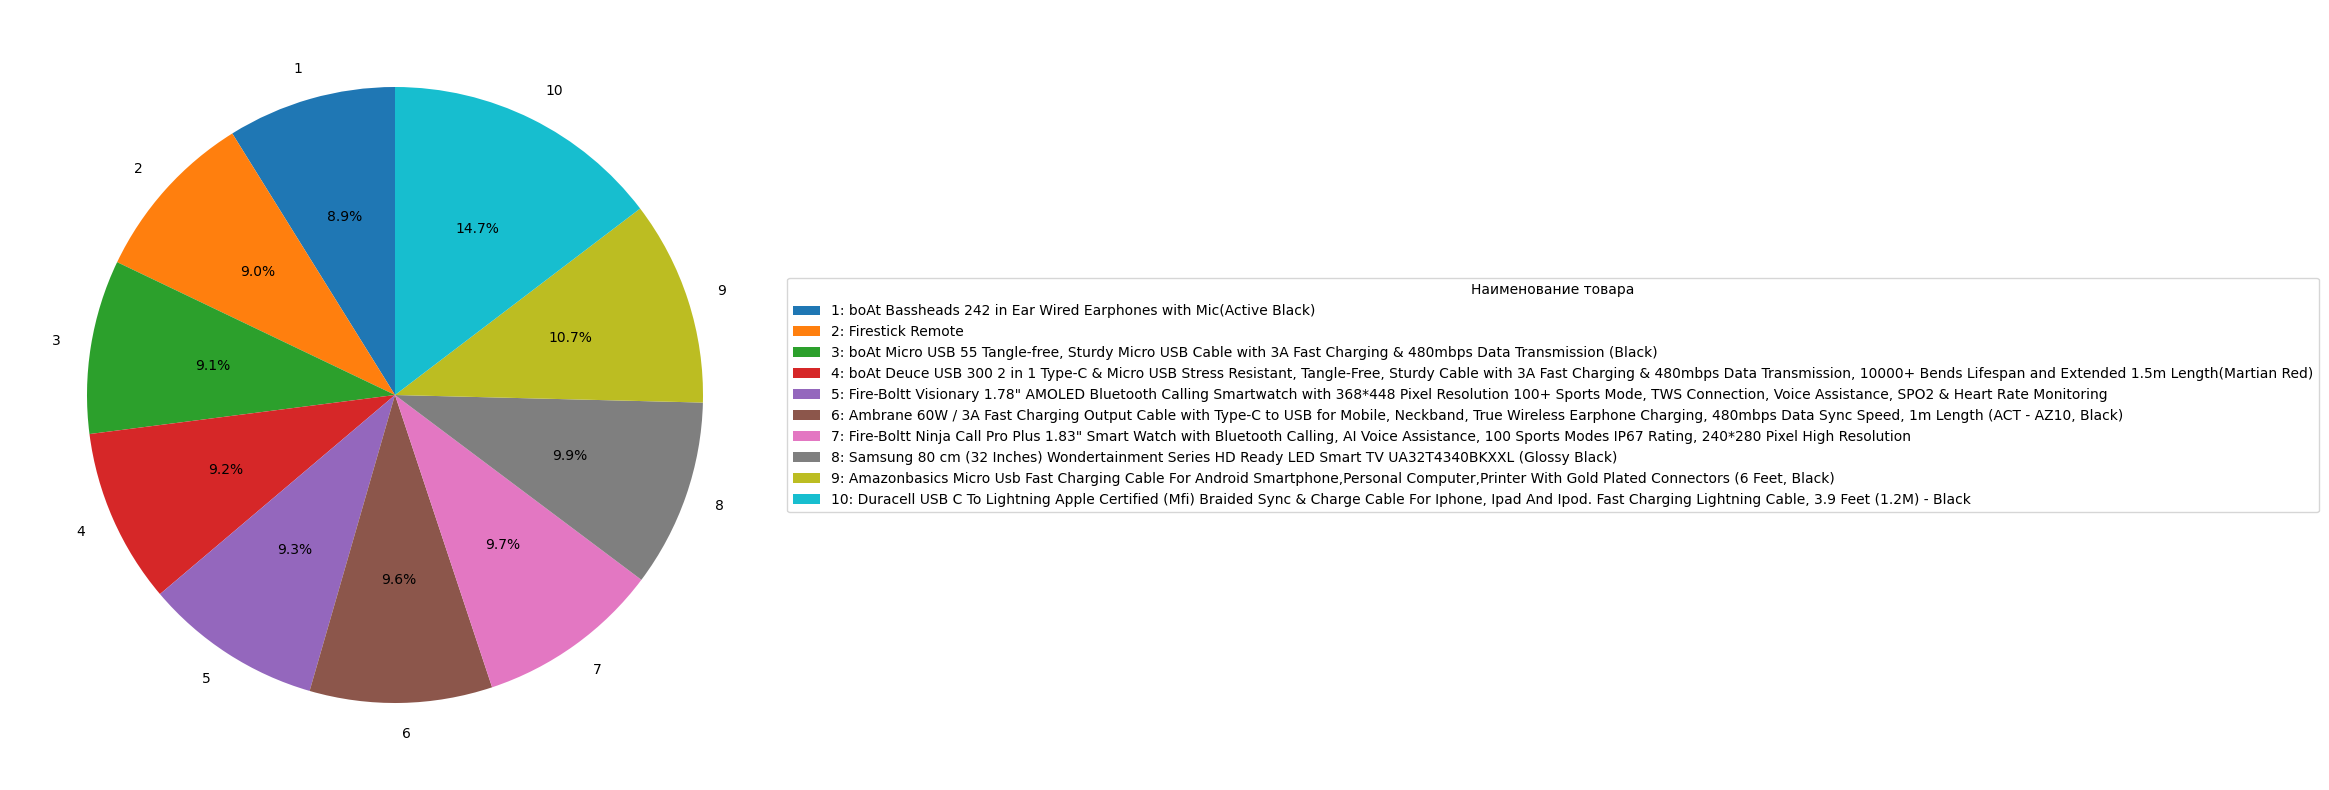

In [45]:
# Сортировка данных по столбцу "Общая стоимость"
df_grouped = df_grouped.sort_values(by="Общая стоимость")
# Оставляем только последние 10 строк
df_grouped = df_grouped[-10:]
df_grouped['Номер'] = range(1, 11)

# Построение круговой диаграммы
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(df_grouped['Доля от общей выручки в %'], labels=df_grouped['Номер'], autopct='%1.1f%%', startangle=90)

# Добавление легенды
legend_labels = [f"{num}: {name}" for num, name in zip(df_grouped['Номер'], df_grouped['Название товара'])]
ax.legend(legend_labels, title="Наименование товара", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

In [46]:
df_grouped[[ 'Общая стоимость', 'Доля от общей выручки в %']]

,Общая стоимость,Доля от общей выручки в %
Название товара,,
boAt Bassheads 242 in Ear Wired Earphones with Mic(Active Black),5169806.08,0.371229
Firestick Remote,5277370.78,0.378953
"boAt Micro USB 55 Tangle-free, Sturdy Micro USB Cable with 3A Fast Charging & 480mbps Data Transmission (Black)",5323200.88,0.382244
"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)",5346193.56,0.383895
"Fire-Boltt Visionary 1.78"" AMOLED Bluetooth Calling Smartwatch with 368*448 Pixel Resolution 100+ Sports Mode, TWS Connection, Voice Assistance, SPO2 & Heart Rate Monitoring",5452856.75,0.391554
"Ambrane 60W / 3A Fast Charging Output Cable with Type-C to USB for Mobile, Neckband, True Wireless Earphone Charging, 480mbps Data Sync Speed, 1m Length (ACT - AZ10, Black)",5588039.86,0.401261
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5632341.30,0.404442
Samsung 80 cm (32 Inches) Wondertainment Series HD Ready LED Smart TV UA32T4340BKXXL (Glossy Black),5748922.46,0.412814
"Amazonbasics Micro Usb Fast Charging Cable For Android Smartphone,Personal Computer,Printer With Gold Plated Connectors (6 Feet, Black)",6268274.32,0.450107
